In [2]:
import os
import sys

cwd = os.getcwd()+'/'
sys.path.insert(0, cwd+'PETBarriers/')

from petbarriers.morse import *

datapath = cwd + 'PETBarriers/data/'

%matplotlib inline

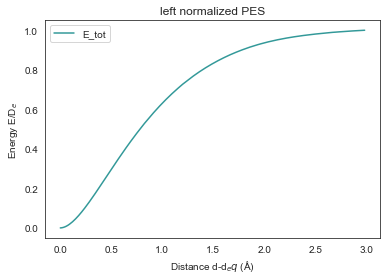

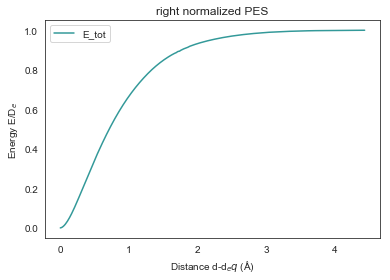

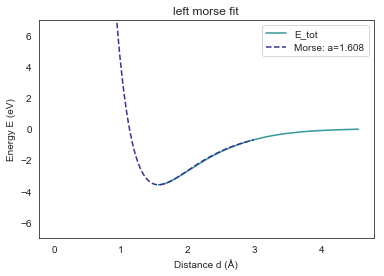

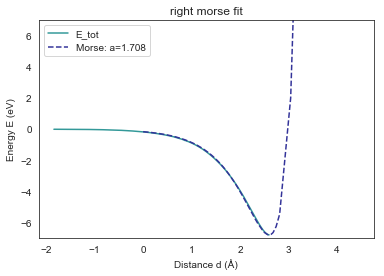

In [3]:
# We computed a series of DFT single points:

# (1) Pt ---- H at several d(Pt-H)
# We read in the data and check the normalized curve with plot=True
# Note that the proton initial state is "left", i.e. the hydrogen is ABOVE the Pt surface.
pes1 = PES(datapath + 'Pt.tsv', donor='left', dHeq=1.56, plot=True)

# (2) H ---- OH at several d(H-OH)
# Note that the proton initial state is "right", that is the hydrogen is BELOW the water.
pes2 = PES(datapath + 'H2O.tsv', donor='right', dHeq=2.6, plot=True)

# We check the Morse fits of both potential energy curves
pes1.plot_morse()
pes2.plot_morse()

# We have now two potential energy curve (PES) objects

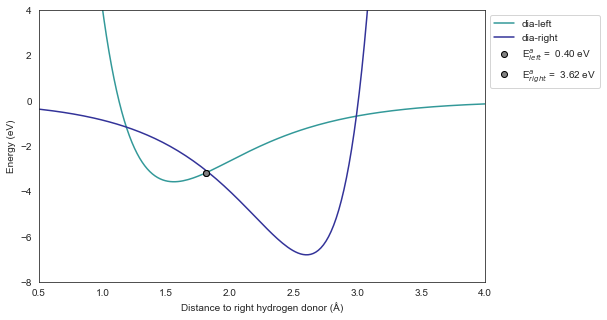

Diabatic forward barrier  0.40 eV
Diabatic backward barrier  3.62 eV


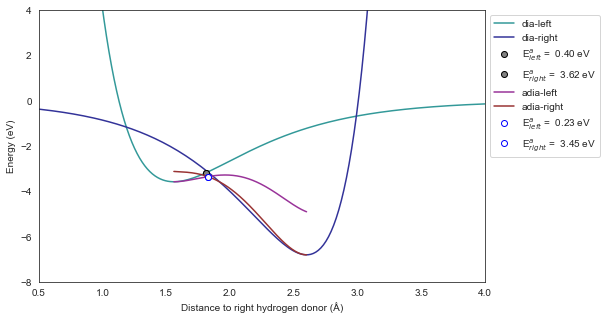

Adiabatic forward barrier  0.23 eV
Adiabatic backward barrier  3.45 eV


In [4]:
# In order to transfer teh hydrogen from one state (one PES object) to the other, 
# we instantiate the Energy object, giving it first the PES, we want to see on the left,
# and then the one we want to see on the right
e = Energy(pes1, pes2)

# We get the diabatic interception like this:
Ea_dia = e.interception(plot=True)      # returns distance from first state and forward Ea
print('Diabatic forward barrier %5.2f eV' %e.Ea_left)
print('Diabatic backward barrier %5.2f eV' %e.Ea_right)

# We get the adiabatic barrier estimate like this:
e.interception(adiabatic=True, plot=True)
print('Adiabatic forward barrier %5.2f eV' %e.Ea_ad_left)
print('Adiabatic backward barrier %5.2f eV' %e.Ea_ad_right)


